In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
#import re
#sns.set()

In [2]:
df = pd.read_csv('hotel.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

# Soal 1
Buatlah fungsi dengan satu argumen berupa dataframe untuk mengecek jumlah null value (nilai yang berisi null atau kosong), percent null value (nilai yang berisi null atau kosong dalam persen), data type (tipe data), serta jumlah unique value (nilai yang unik) tiap kolom yang ada di sebuah dataframe

In [4]:
data = []

def check(x):
    for i in x.columns:
        data.append([x[i].dtype,\
                     x[i].isna().sum(),\
                     round(100*(x[i].isna().sum()/len(x)),2),\
                     x[i].nunique()
                    ])
    return pd.DataFrame(columns=['dataType', 'null', 'nullPct', 'unique'], data=data, index=x.columns)

In [5]:
check(df)

,dataType,null,nullPct,unique
hotel,object,0,0.00,2
is_canceled,int64,0,0.00,2
lead_time,int64,0,0.00,479
arrival_date_year,int64,0,0.00,3
arrival_date_month,object,0,0.00,12
arrival_date_week_number,int64,0,0.00,53
arrival_date_day_of_month,int64,0,0.00,31
stays_in_weekend_nights,int64,0,0.00,17
stays_in_week_nights,int64,0,0.00,35
adults,int64,0,0.00,14


In [6]:
df.shape

(119390, 32)

# Soal 2
Ada berapa berapa jumlah pengunjung yang membatalkan reservasi dan yang tidak? Dan dari jumlah tersebut buatlah kesimpulan mengenai proporsisi masing-masing!

In [7]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [8]:
df.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

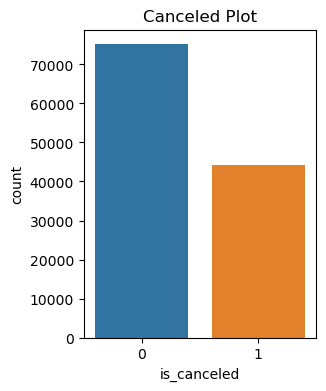

In [9]:
fig = plt.figure(figsize=(3,4))
sns.countplot(data=df, x=df['is_canceled'])
plt.title('Canceled Plot')
plt.show()

# Soal 3
A. Untuk “City Hotel”, berapa persen reservasi yang dibatalkan?\
B. Untuk “Resort Hotel”, berapa persen reservasi yang dibatalkan?

In [10]:
df[df['hotel'] == 'City Hotel']['is_canceled'].value_counts(normalize=True)

0    0.58273
1    0.41727
Name: is_canceled, dtype: float64

In [11]:
df[df['hotel'] == 'Resort Hotel']['is_canceled'].value_counts(normalize=True)

0    0.722366
1    0.277634
Name: is_canceled, dtype: float64

# Soal 4
Lakukan filter sehingga hanya menampilkan data pengunjung yang tidak membatalkan reservasi. Dan simpan hasilnya dalam variabel `df_checkout`

In [12]:
df_checkout = df[df['is_canceled'] == 0]
df_checkout.shape

(75166, 32)

In [13]:
df_checkout = df_checkout.reset_index()
df_checkout.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
df_checkout = df_checkout.rename(columns={'index' : 'id'})
df_checkout.head()

,id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Soal 5
A. Tampilkan jumlah reservasi tiap bulan kedatangan untuk masing-masing jenis hotel.\
B. Lalu di bulan apa terdapat reservasi yang paling banyak di masing-masing jenis hotel? Buatlah kesimpulan apakah trennya sama di kedua jenis hotel?\`
C. Lakukan seperti point B namun dengan nama bulan yang sudah di-mapping menjadi bulan dalam angka
> Untuk pertanyaan ini dan selanjutnya akan menggunakan dataframe `df_checkout`

In [15]:
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September 

In [16]:
import calendar

month_dict = {month: i 
              for i, month in enumerate(calendar.month_name) 
              if month
             }

month_dict

{'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}

In [17]:
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month'].map(month_dict)
df_checkout['arrival_date_month_num'].head()

0    7
1    7
2    7
3    7
4    7
Name: arrival_date_month_num, dtype: int64

In [18]:
df_checkout.groupby(['hotel', 'arrival_date_month_num']).size()

hotel         arrival_date_month_num
City Hotel    1                         2254
              2                         3064
              3                         4072
              4                         4015
              5                         4579
              6                         4366
              7                         4782
              8                         5381
              9                         4290
              10                        4337
              11                        2696
              12                        2392
Resort Hotel  1                         1868
              2                         2308
              3                         2573
              4                         2550
              5                         2535
              6                         2038
              7                         3137
              8                         3257
              9                         2102
              10  

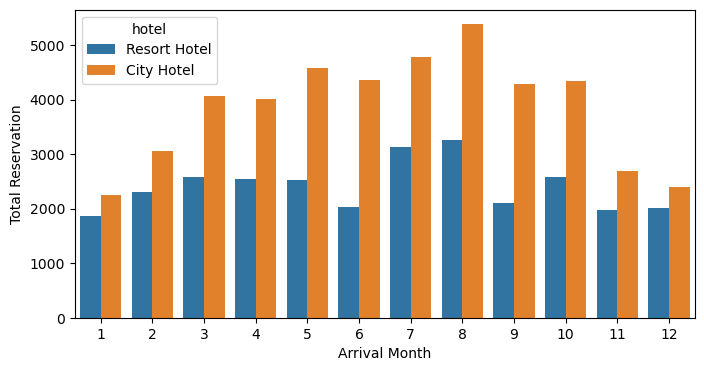

In [19]:
fig = plt.figure(figsize=(8,4))
sns.countplot(data=df_checkout, x=df_checkout['arrival_date_month_num'], hue=df_checkout['hotel'])
plt.xlabel('Arrival Month')
plt.ylabel('Total Reservation')
plt.show()

# Soal 6
A. Buat sebuah kolom baru bernama `arrival_date` yang berisi info lengkap tentang tahun, bulan, dan tanggal kedatangan.\
B. Ubah kolom menjadi tipe datetime.\
Hint: gabungkan tahun, bulan, dan tanggal menjadi format `yyyy-mm-dd`

In [20]:
df_checkout[['arrival_date_year','arrival_date_month_num', 'arrival_date_day_of_month']].dtypes

arrival_date_year            int64
arrival_date_month_num       int64
arrival_date_day_of_month    int64
dtype: object

In [21]:
df_checkout['arrival_date_month_num'] = df_checkout['arrival_date_month_num'].astype('str').str.pad(2, fillchar='0')
df_checkout['arrival_date_month_num']

0        07
1        07
2        07
3        07
4        07
         ..
75161    08
75162    08
75163    08
75164    08
75165    08
Name: arrival_date_month_num, Length: 75166, dtype: object

In [22]:
df_checkout['arrival_date_day_of_month'] = df_checkout['arrival_date_day_of_month'].astype('str').str.pad(2, fillchar='0')
df_checkout['arrival_date_day_of_month'].head(10)

0    01
1    01
2    01
3    01
4    01
5    01
6    01
7    01
8    01
9    01
Name: arrival_date_day_of_month, dtype: object

In [23]:
df_checkout[['arrival_date_year','arrival_date_month_num', 'arrival_date_day_of_month']].dtypes

arrival_date_year             int64
arrival_date_month_num       object
arrival_date_day_of_month    object
dtype: object

In [24]:
df_checkout['arrival_date'] = df_checkout['arrival_date_year'].astype('str') + '-' + \
                              df_checkout['arrival_date_month_num'] + '-' + \
                              df_checkout['arrival_date_day_of_month']

df_checkout['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
75161    2017-08-30
75162    2017-08-31
75163    2017-08-31
75164    2017-08-31
75165    2017-08-29
Name: arrival_date, Length: 75166, dtype: object

In [25]:
df_checkout['arrival_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 75166 entries, 0 to 75165
Series name: arrival_date
Non-Null Count  Dtype 
--------------  ----- 
75166 non-null  object
dtypes: object(1)
memory usage: 587.4+ KB


In [26]:
df_checkout['arrival_date'] = pd.to_datetime(df_checkout['arrival_date'])
df_checkout['arrival_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 75166 entries, 0 to 75165
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
75166 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 587.4 KB


# Soal 7
Mari kita bermain dengan time-series data menggunakan kolom `arrival_date`. Buat 2 dataframe yang menunjukkan sbb:\
A. Total reservasi harian (`df_total_daily`)\
B. Rata-rata reservasi harian di tiap minggu (`df_avg_daily`)
> Stop and think! Apa perbedaan data yang ditunjukkan oleh `df_total_daily` dan `df_avg_daily`?

In [27]:
df_total_daily = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'total_reservation'})
df_total_daily.head(10)

,arrival_date,total_reservation
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
5,2015-07-06,41
6,2015-07-07,29
7,2015-07-08,45
8,2015-07-09,29
9,2015-07-10,42


In [28]:
df_avg_daily = df_total_daily.resample('W', on='arrival_date')['total_reservation'].mean().reset_index()
df_avg_daily#.head(10)

,arrival_date,total_reservation
0,2015-07-05,51.600000
1,2015-07-12,40.571429
2,2015-07-19,53.857143
3,2015-07-26,53.000000
4,2015-08-02,47.142857
...,...,...
109,2017-08-06,101.000000
110,2017-08-13,98.000000
111,2017-08-20,103.714286
112,2017-08-27,103.142857


In [29]:
print(df_total_daily.shape)
print(df_avg_daily.shape)

(793, 2)
(114, 2)


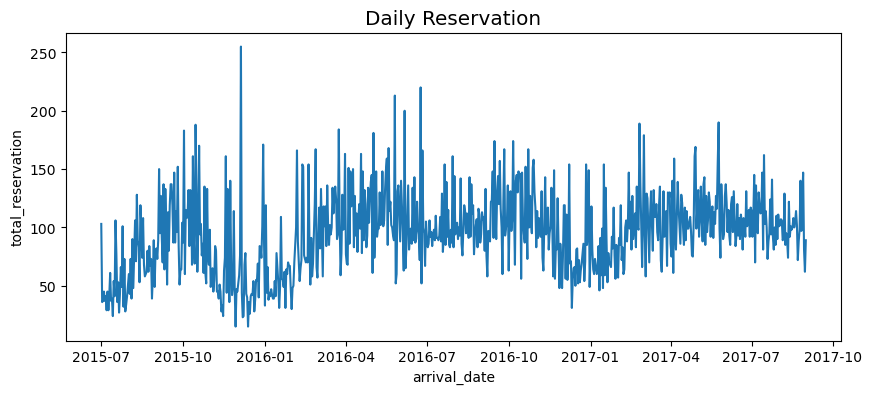

In [30]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_total_daily, x=df_total_daily['arrival_date'], y=df_total_daily['total_reservation'])
plt.title('Daily Reservation', fontsize='x-large')
plt.show()

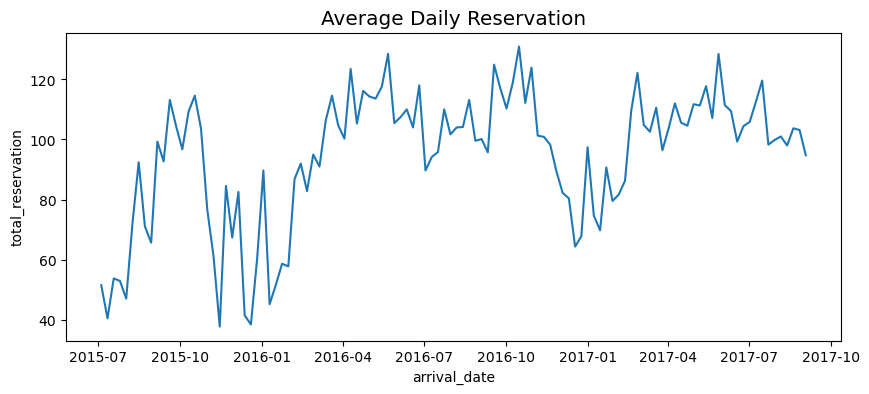

In [31]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_daily, x=df_avg_daily['arrival_date'], y=df_avg_daily['total_reservation'])
plt.title('Average Daily Reservation', fontsize='x-large')
plt.show()

# Soal 8
A. Berapa rata-rata ADR berdasarkan jenis hotel dan jenis customer (customer_type)?\
B. Jenis customer mana yang memiliki ADR paling besar di masing-masing jenis hotel?

In [32]:
df_checkout['adr'].head()

0     0.0
1     0.0
2    75.0
3    75.0
4    98.0
Name: adr, dtype: float64

In [33]:
pd.DataFrame(df_checkout.groupby(['hotel', 'customer_type'])['adr'].mean()).reset_index()

,hotel,customer_type,adr
0,City Hotel,Contract,108.929255
1,City Hotel,Group,87.398712
2,City Hotel,Transient,110.423280
3,City Hotel,Transient-Party,93.705007
4,Resort Hotel,Contract,78.581674
5,Resort Hotel,Group,77.306575
6,Resort Hotel,Transient,96.001928
7,Resort Hotel,Transient-Party,77.204010


<AxesSubplot:xlabel='adr', ylabel='hotel'>

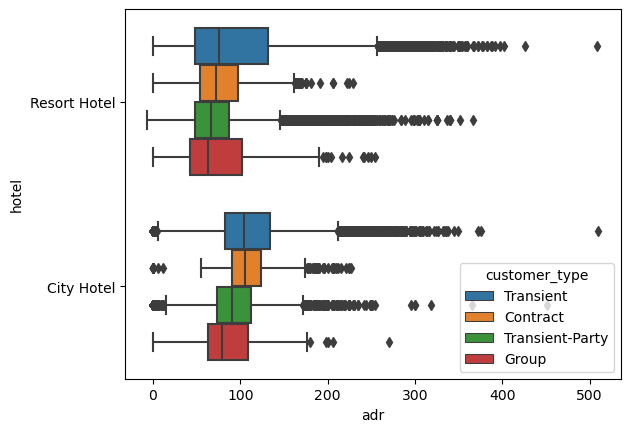

In [34]:
sns.boxplot(data=df_checkout, x=df_checkout['adr'], y=df_checkout['hotel'], hue=df_checkout['customer_type'])